In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# All the data set
data = {
    'Zip_Code': [19104.0, 19106.0, 19111.0, 19114.0, 19116.0, 19120.0, 19121.0, 19122.0, 19123.0, 19124.0,
                 19125.0, 19128.0, 19129.0, 19130.0, 19131.0, 19132.0, 19133.0, 19134.0, 19136.0, 19138.0,
                 19139.0, 19140.0, 19141.0, 19142.0, 19143.0, 19145.0, 19147.0, 19148.0, 19150.0, 19154.0],
    'Average_Daily_Attendance': [90.681429, 91.84, 90.561667, 91.03, 91.85, 89.926364, 84.866, 84.828571,
                                 90.83, 85.8825, 86.417143, 89.481667, 85.885, 89.196667, 86.122, 83.658,
                                 86.525, 86.89625, 87.9, 88.404, 86.703, 85.455455, 90.887143, 87.708,
                                 86.33, 88.7325, 94.172857, 89.25375, 90.923333, 91.413333],
    'Graduation_Rate_IEPs': [88.1875, np.nan, 73.525, 93.315, 63.4, np.nan, 31.36, 70.0575, 21.97,
                             41.506667, 66.788333, 80.3775, 84.735, 50.735, 70.14, 40.72, 9.19, 73.54,
                             45.4, 67.9775, 71.428333, 51.1, np.nan, 68.485, 92.935, np.nan, 98.445,
                             65.215, 54.17, 90.0],
    'Climate_metric_score': [6.84, 6.8, 6.7, 7.3, 7.357143, 6.172727, 6.4, 6.45, 7.0, 6.245455, 6.744444,
                             7.016667, 6.9, 7.033333, 6.5625, 6.314286, 5.914286, 6.542857, 6.48, 6.65,
                             6.275, 6.266667, 6.325, 6.34, 5.633333, 6.855556, 7.216667, 6.6, 6.566667,
                             6.666667],
    'Graduation_Rate_All_Students': [71.006667, 96.3, 45.68, 96.3, 72.49, np.nan, 45.735714, 79.04,
                                      55.985, 35.615, 59.7175, 87.12, 83.33, 76.795, 83.99, 42.44, 10.68,
                                      73.33, 46.065, 77.443333, 61.208, 46.363333, 71.5, 40.85, 93.83,
                                      100.0, 97.695, 59.903333, 61.32, 98.59],
    'average_snap_percent': [25.819048, 14.036364, 30.957895, 28.566667, 28.625, 42.478947, 35.166667,
                             37.266667, 17.4, 44.67619, 33.49375, 20.685714, 28.31, 15.771429, 33.5,
                             47.75625, 57.615385, 50.122222, 27.754545, 35.423077, 32.623529, 49.408696,
                             36.85, 30.9, 31.640909, 27.386667, 18.070588, 25.8, 31.325, 28.8],
    'average_poverty_percent': [34.666667, 8.427273, 17.984211, 10.166667, 15.3875, 29.578947, 33.8,
                                33.208333, 15.26, 29.209524, 20.2375, 7.314286, 21.25, 14.514286,
                                28.884211, 33.0125, 40.438462, 36.5, 14.627273, 25.030769, 30.541176,
                                38.326087, 29.15, 27.333333, 27.572727, 15.506667, 9.788235,
                                16.285714, 12.25, 9.833333],
    'average_disability_Percent': [25.819048, 14.036364, 30.957895, 28.566667, 28.625, 42.478947,
                                    35.166667, 37.266667, 17.4, 44.67619, 33.49375, 20.685714, 28.31,
                                    15.771429, 33.5, 47.75625, 57.615385, 50.122222, 27.754545, 35.423077,
                                    32.623529, 49.408696, 36.85, 30.9, 31.640909, 27.386667,
                                    18.070588, 25.8, 31.325, 28.8]
}

df = pd.DataFrame(data)

# Replace missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Releveant columns
features = df.drop('Zip_Code', axis=1)

#Scale feature
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Cluster into 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#Calculate the average need for each cluster
cluster_avg = df.groupby('Cluster').mean().reset_index()

#Rank the clusters based on the average need
cluster_avg['Rank'] = cluster_avg.mean(axis=1).rank(ascending=True)
cluster_avg.sort_values('Rank', inplace=True)

# Get the cluster with the highest need
high_need_cluster = cluster_avg.iloc[0]['Cluster']

# Get the zip codes in the highest need cluster
highest_need_zip_codes = df[df['Cluster'] == high_need_cluster]['Zip_Code']

print(highest_need_zip_codes)


6     19121.0
9     19124.0
15    19132.0
16    19133.0
17    19134.0
21    19140.0
Name: Zip_Code, dtype: float64


/opt/tljh/user/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/opt/tljh/user/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


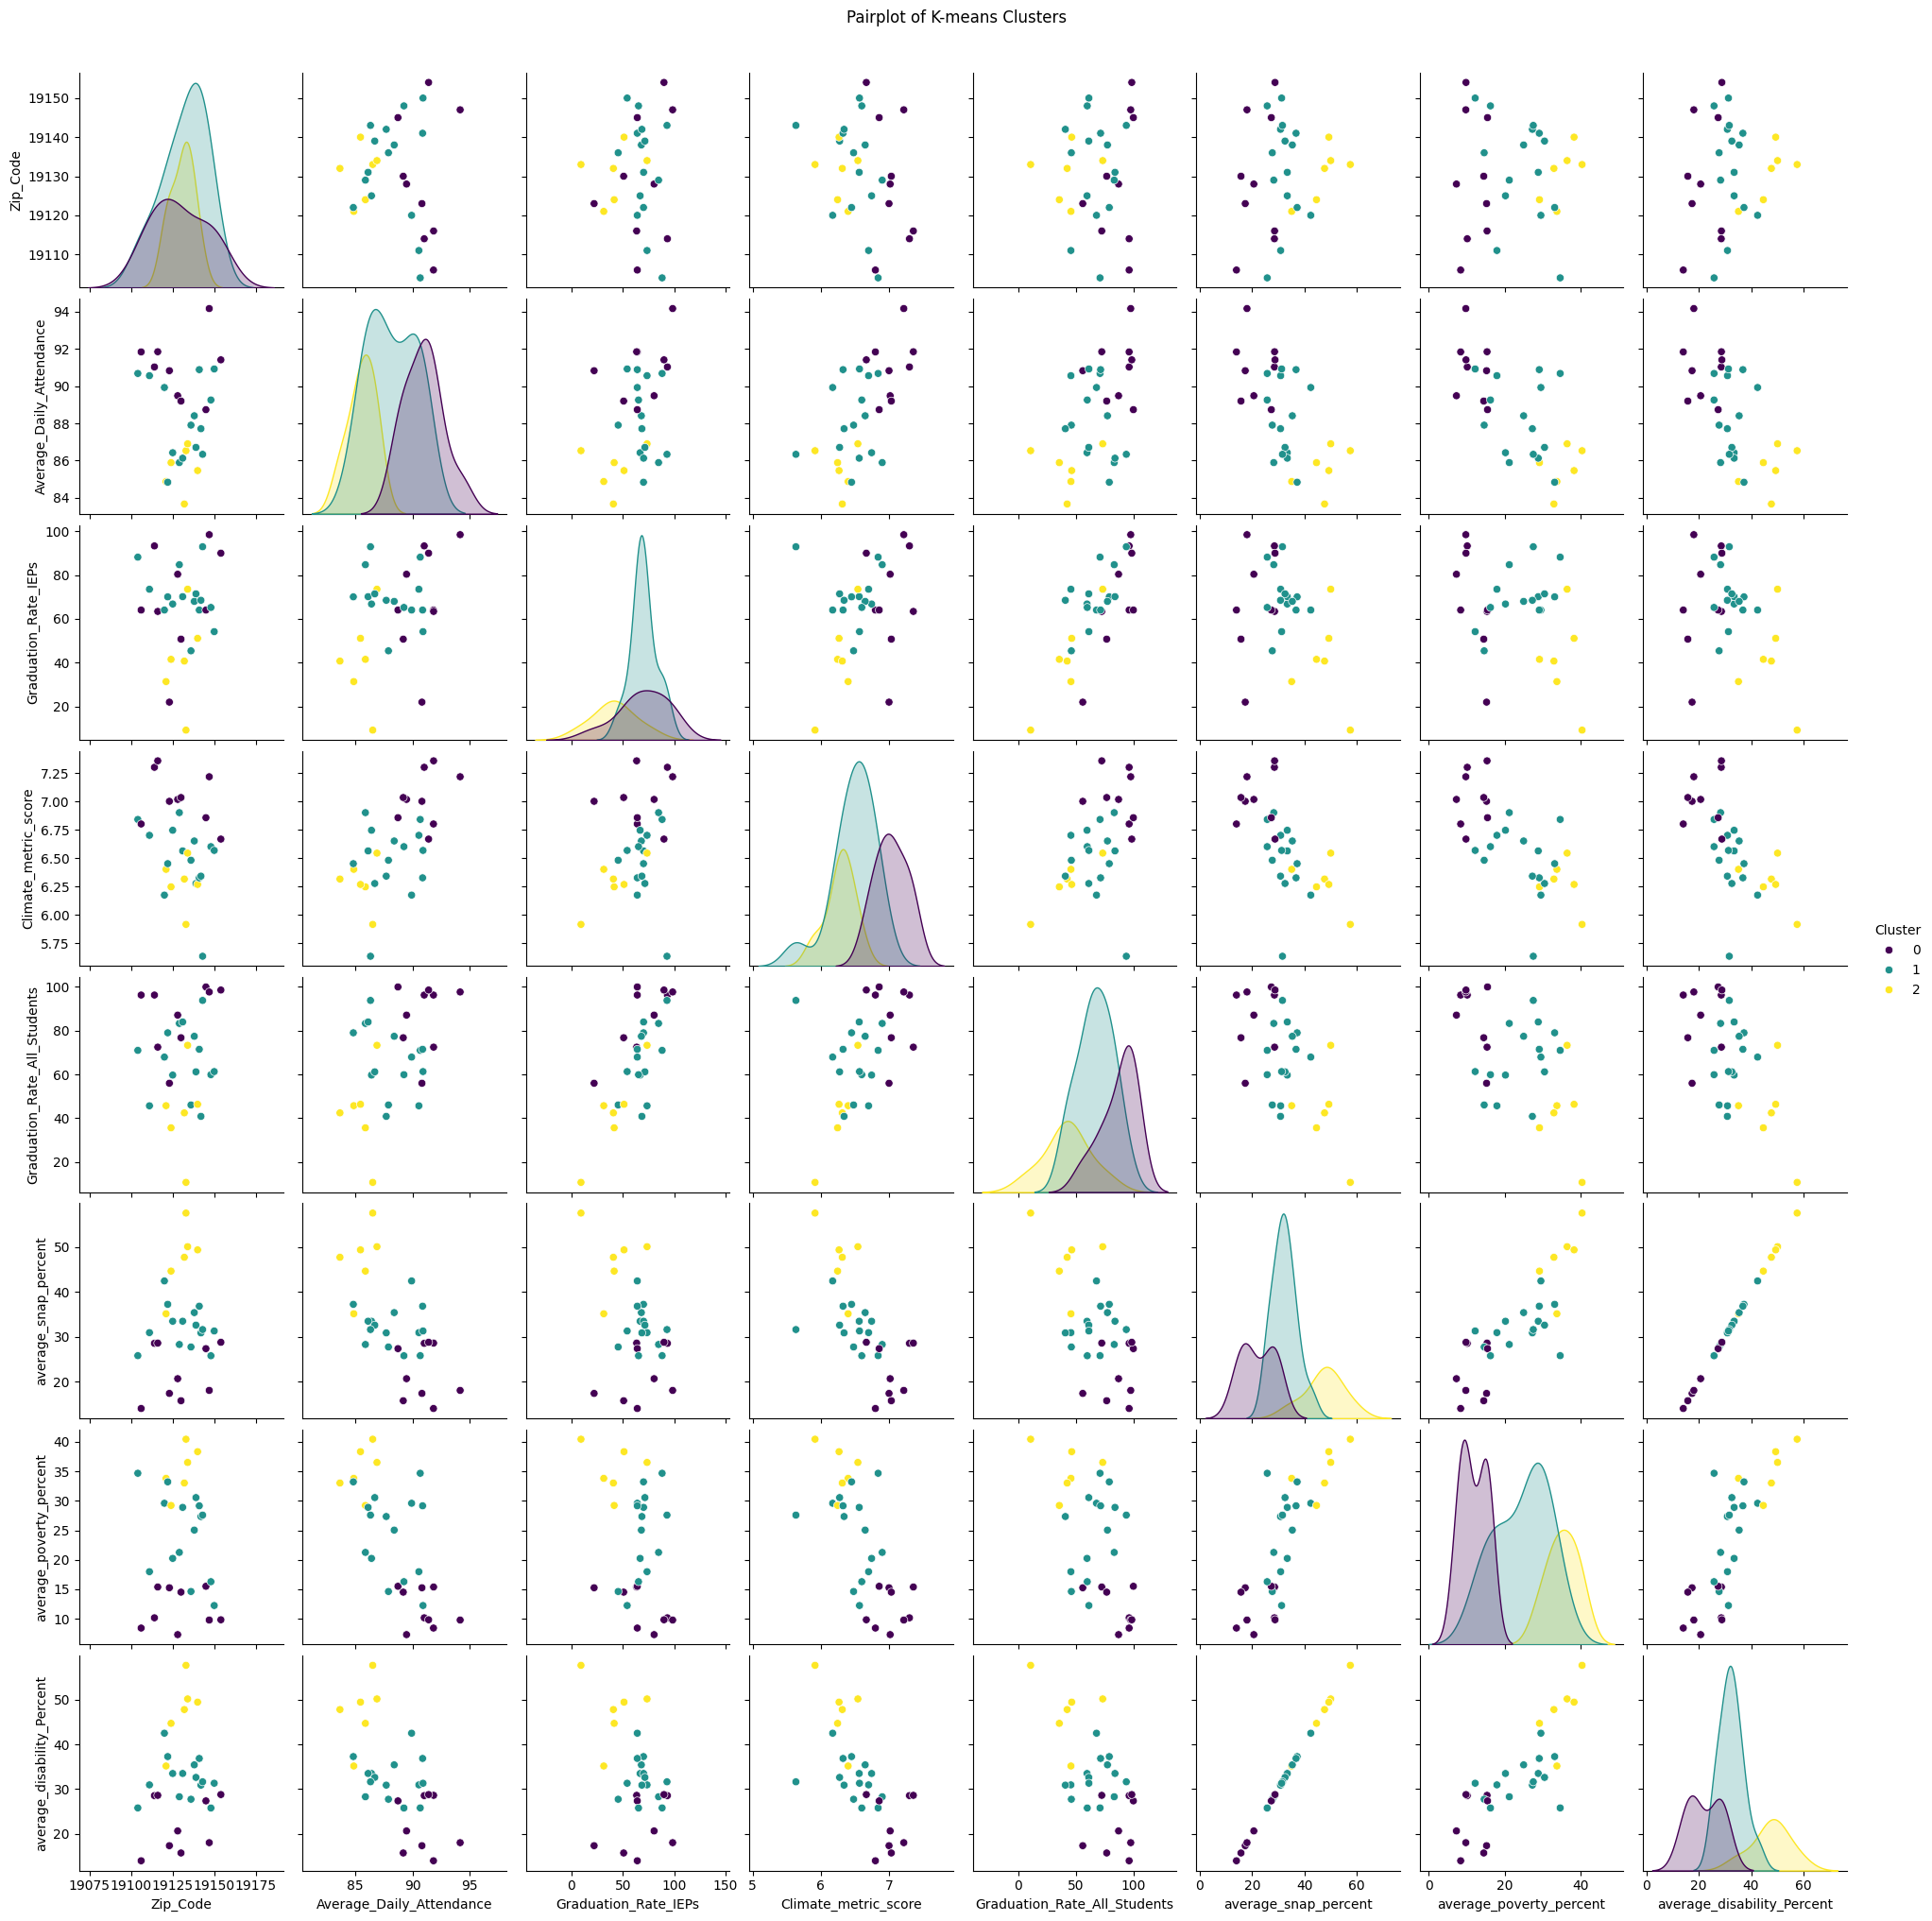

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = {
    'Zip_Code': [19104.0, 19106.0, 19111.0, 19114.0, 19116.0, 19120.0, 19121.0, 19122.0, 19123.0, 19124.0,
                 19125.0, 19128.0, 19129.0, 19130.0, 19131.0, 19132.0, 19133.0, 19134.0, 19136.0, 19138.0,
                 19139.0, 19140.0, 19141.0, 19142.0, 19143.0, 19145.0, 19147.0, 19148.0, 19150.0, 19154.0],
    'Average_Daily_Attendance': [90.681429, 91.84, 90.561667, 91.03, 91.85, 89.926364, 84.866, 84.828571,
                                 90.83, 85.8825, 86.417143, 89.481667, 85.885, 89.196667, 86.122, 83.658,
                                 86.525, 86.89625, 87.9, 88.404, 86.703, 85.455455, 90.887143, 87.708,
                                 86.33, 88.7325, 94.172857, 89.25375, 90.923333, 91.413333],
    'Graduation_Rate_IEPs': [88.1875, np.nan, 73.525, 93.315, 63.4, np.nan, 31.36, 70.0575, 21.97,
                             41.506667, 66.788333, 80.3775, 84.735, 50.735, 70.14, 40.72, 9.19, 73.54,
                             45.4, 67.9775, 71.428333, 51.1, np.nan, 68.485, 92.935, np.nan, 98.445,
                             65.215, 54.17, 90.0],
    'Climate_metric_score': [6.84, 6.8, 6.7, 7.3, 7.357143, 6.172727, 6.4, 6.45, 7.0, 6.245455, 6.744444,
                             7.016667, 6.9, 7.033333, 6.5625, 6.314286, 5.914286, 6.542857, 6.48, 6.65,
                             6.275, 6.266667, 6.325, 6.34, 5.633333, 6.855556, 7.216667, 6.6, 6.566667,
                             6.666667],
    'Graduation_Rate_All_Students': [71.006667, 96.3, 45.68, 96.3, 72.49, np.nan, 45.735714, 79.04,
                                      55.985, 35.615, 59.7175, 87.12, 83.33, 76.795, 83.99, 42.44, 10.68,
                                      73.33, 46.065, 77.443333, 61.208, 46.363333, 71.5, 40.85, 93.83,
                                      100.0, 97.695, 59.903333, 61.32, 98.59],
    'average_snap_percent': [25.819048, 14.036364, 30.957895, 28.566667, 28.625, 42.478947, 35.166667,
                             37.266667, 17.4, 44.67619, 33.49375, 20.685714, 28.31, 15.771429, 33.5,
                             47.75625, 57.615385, 50.122222, 27.754545, 35.423077, 32.623529, 49.408696,
                             36.85, 30.9, 31.640909, 27.386667, 18.070588, 25.8, 31.325, 28.8],
    'average_poverty_percent': [34.666667, 8.427273, 17.984211, 10.166667, 15.3875, 29.578947, 33.8,
                                33.208333, 15.26, 29.209524, 20.2375, 7.314286, 21.25, 14.514286,
                                28.884211, 33.0125, 40.438462, 36.5, 14.627273, 25.030769, 30.541176,
                                38.326087, 29.15, 27.333333, 27.572727, 15.506667, 9.788235,
                                16.285714, 12.25, 9.833333],
    'average_disability_Percent': [25.819048, 14.036364, 30.957895, 28.566667, 28.625, 42.478947,
                                    35.166667, 37.266667, 17.4, 44.67619, 33.49375, 20.685714, 28.31,
                                    15.771429, 33.5, 47.75625, 57.615385, 50.122222, 27.754545, 35.423077,
                                    32.623529, 49.408696, 36.85, 30.9, 31.640909, 27.386667,
                                    18.070588, 25.8, 31.325, 28.8]
}

df = pd.DataFrame(data)

# Replace missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Selecting the columns we need 
features = df.drop('Zip_Code', axis=1)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Apply K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of K-means Clusters', y=1.02)
plt.show()



In [29]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


/opt/tljh/user/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin Index: 1.1267237806212156


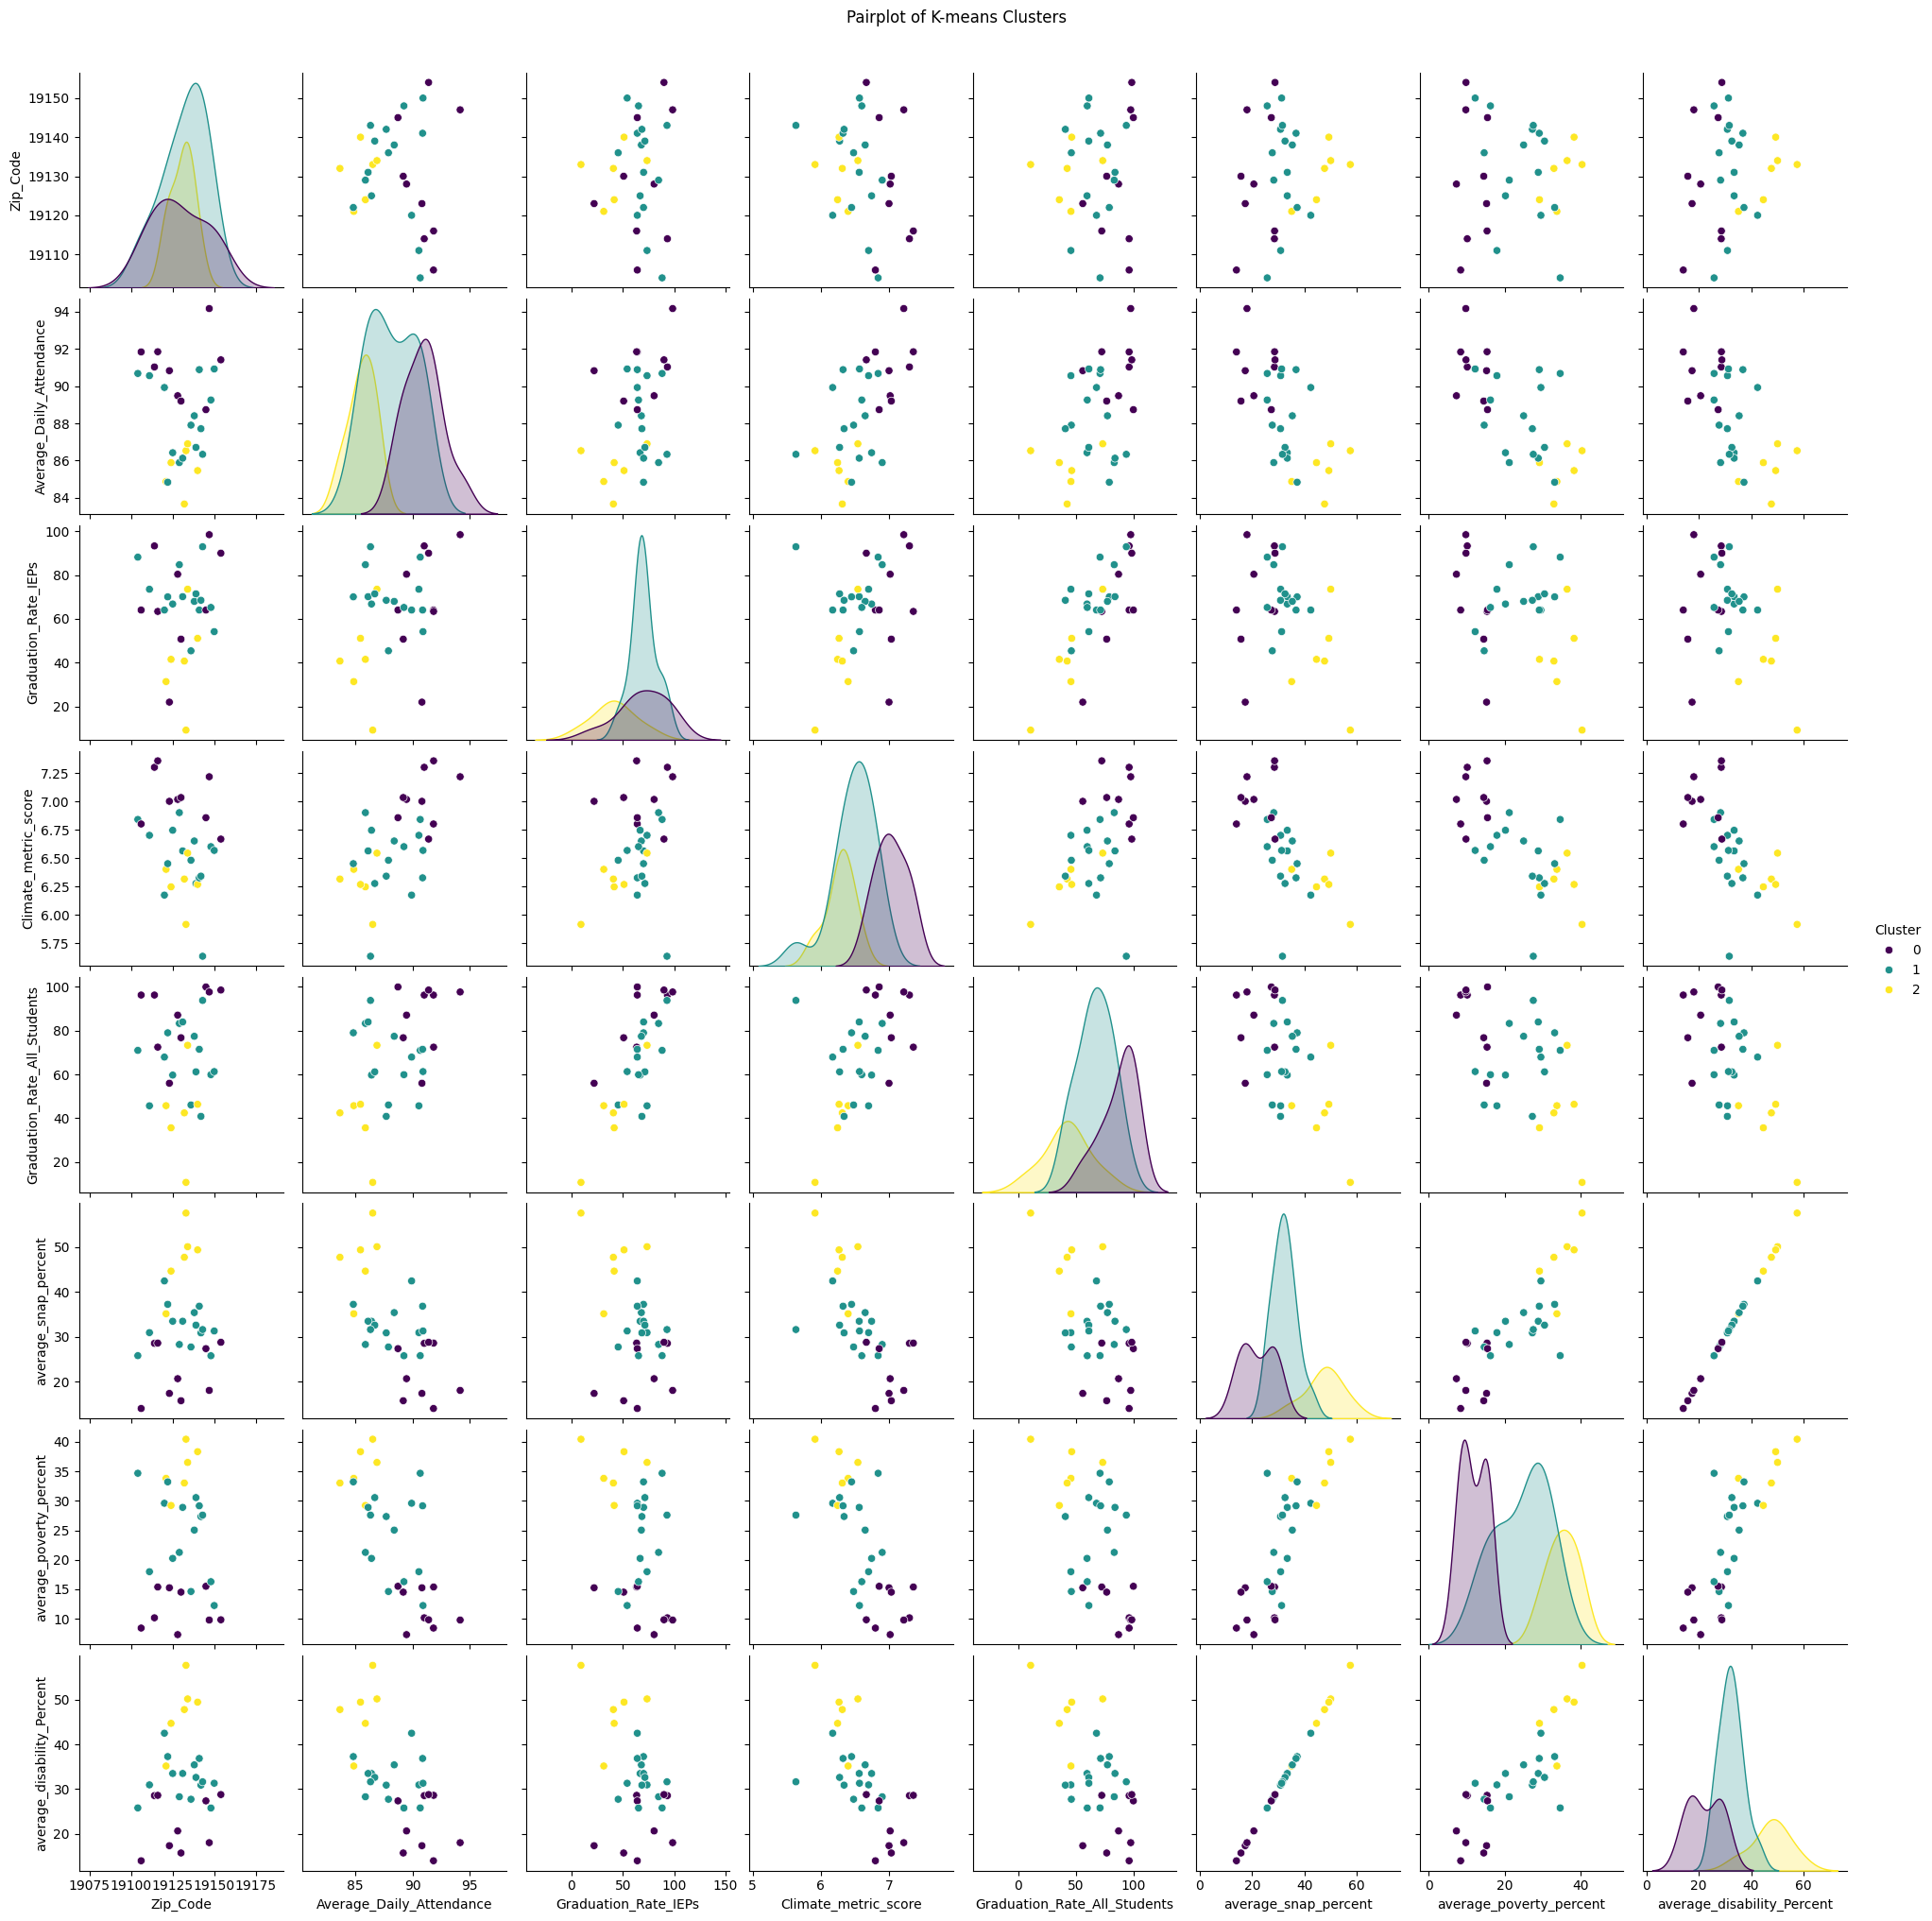

In [32]:
import seaborn as sns
# Calculate the Davies-Bouldin Index
cluster_labels = kmeans.fit_predict(scaled_features)
db_index = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of K-means Clusters', y=1.02)
plt.show()

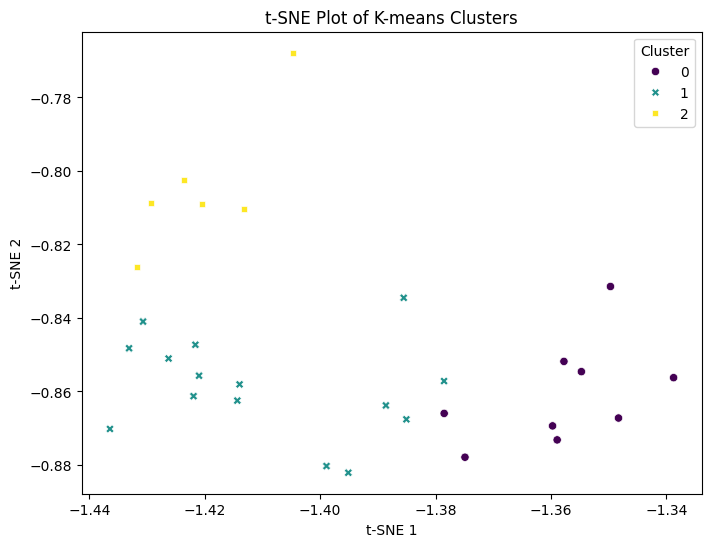

In [19]:
from sklearn.manifold import TSNE

# Assuming you have a DataFrame 'df' with less than 30 samples
n_samples = df.shape[0]  # Number of samples in your data
perplexity_value = min(30, n_samples - 1)  # Ensure perplexity is less than the number of samples

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
tsne_results = tsne.fit_transform(scaled_features)
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = df['Cluster']

# Plotting the results of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=tsne_df, style='Cluster', palette='viridis')
plt.title('t-SNE Plot of K-means Clusters')
plt.show()


/tmp/ipykernel_51608/3785856358.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Cluster'], y=silhouette_vals, palette='viridis')


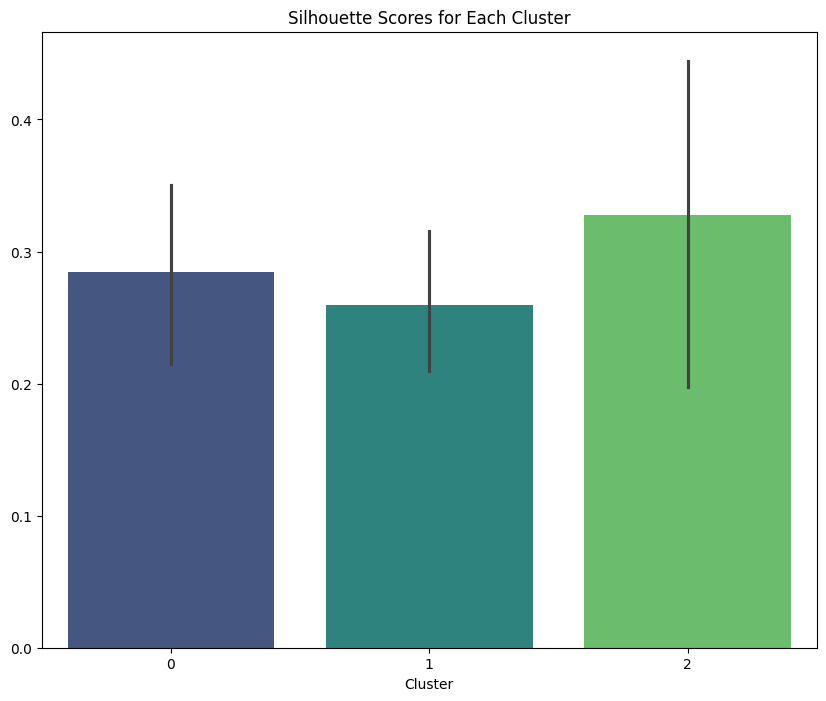

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Silhouette analysis
silhouette_vals = silhouette_samples(scaled_features, df['Cluster'])

# Plot silhouette scores
plt.figure(figsize=(10, 8))
sns.barplot(x=df['Cluster'], y=silhouette_vals, palette='viridis')
plt.title('Silhouette Scores for Each Cluster')
plt.show()

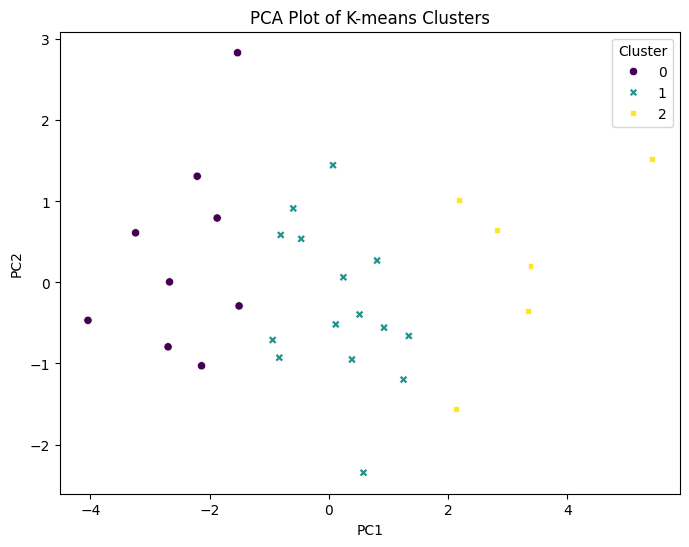

In [14]:
from sklearn.decomposition import PCA

# Perform PCA and reduce to two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = df['Cluster']

# Scatter plot of the two principal components colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', style='Cluster')
plt.title('PCA Plot of K-means Clusters')
plt.show()

## Determine most feasible

In [6]:
print(highest_need_zip_codes)

6     19121.0
9     19124.0
15    19132.0
16    19133.0
17    19134.0
21    19140.0
Name: Zip_Code, dtype: float64


In [7]:
highest_need_zip_codes_data= {
    'Zip_Code':[19121, 19124, 19132, 19133, 19134, 19140],
}

In [8]:
df = pd.DataFrame(data) 

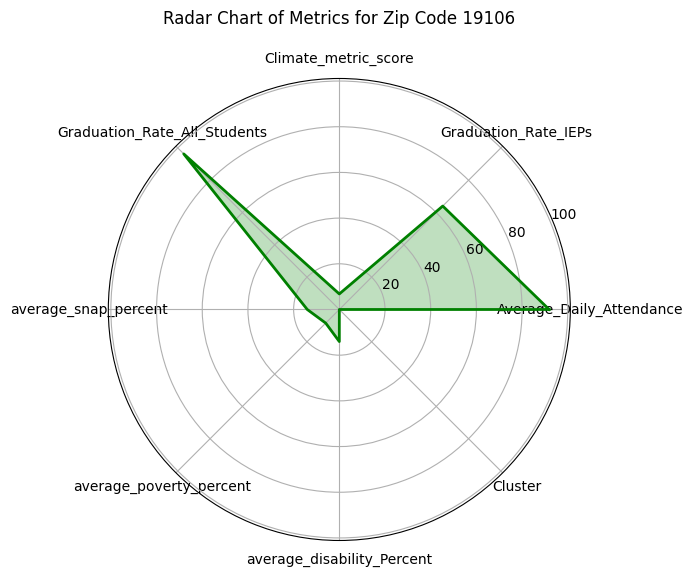

In [26]:
# Select data for a single Zip Code for demonstration
sample_data = df[df['Zip_Code'] == 19106.0]

# Prepare data for the radar chart
labels = np.array(df.columns[1:])  # Since the first column is Zip_Code, skip it
num_vars = len(labels)

# Create the angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Arrange the data
values = sample_data.iloc[0].drop('Zip_Code').values.flatten().tolist()
values += values[:1]  # Complete the loop

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='green', alpha=0.25)
ax.plot(angles, values, color='green', linewidth=2)  # Line plot

# Labels for each attribute
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Title and other customizations
ax.set_title('Radar Chart of Metrics for Zip Code 19106', y=1.1)
ax.grid(True)

plt.show()

NameError: name 'cluster_labels' is not defined